# Before your start:
- Read the README.md file.
- Comment as much as you can and use the resources (README.md file).
- Happy learning!

In [1]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
from scipy.stats import norm
from scipy.stats import poisson
from tqdm.auto import tqdm

# Challenge 1 - Generate and Plot Normal Distributions
#### Step 1: Generate samples and test normal distribution.

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed.

**Hint**: Read the documentation for `scipy.stats.norm.rvs`. The function will help you create the normal random samples.

In [4]:
# your code here
#df = np.random.normal(loc=50,scale = 5, size =[10,50,500,5000])

In [2]:
dist1 = scipy.stats.norm.rvs(loc=50,scale = 5, size =10)
dist2 = scipy.stats.norm.rvs(loc=50,scale = 5, size =50)
dist3 = scipy.stats.norm.rvs(loc=50,scale = 5, size =500)
dist4 = scipy.stats.norm.rvs(loc=50,scale = 5, size =5000)

#### Step 2: Plot normal distributions.

To check the shape of the samples you have just created, you can use matplotlib. For example, you can use it to plot a histogram of each sample. 

If you did, your outputs would be really similar to the ones below:

![normal distributions with different sample sizes](../images/ch-1.png)

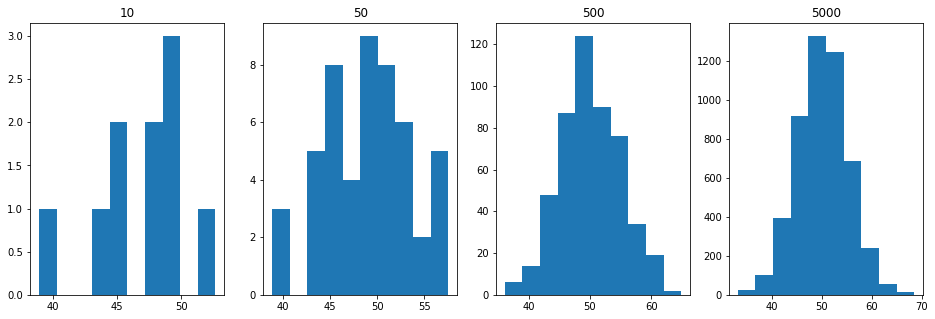

In [3]:
fig, ax = plt.subplots(nrows=1,ncols=4,figsize=(16,5))


ax[0].hist(dist1)
ax[0].set_title('10')   

ax[1].hist(dist2)
ax[1].set_title('50') 

ax[2].hist(dist3)
ax[2].set_title('500') 

ax[3].hist(dist4)
ax[3].set_title('5000') 



plt.show()

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [0]:
"""
your comments here

higher the size of the sample, the data stays more concentrated in the center around of the mean and closer to a 
gauss distributuion

"""

# Challenge 2 - Plot Probability Mass Function (PMF)

### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

### Challenge

We assume that the probability of clicking an advertisement in a Youtube video is 0.15. We have a sample of 5 people who watched the video and we want to plot the PMF for a binomial distribution.

#### Step 1: Create the binomial distribution mentioned above. Store the result in a variable called `dist`. 
**Hint**: use binom from `scipy.stats.binom`. This object takes *n* and *p* as shape parameters, where *n* is the number of independent experiments and *p* the probability of success of the experiment.

In [4]:
# your code here
n=5 
p=0.15
dist = scipy.stats.binom(n=n, p=p)

#### Step 2: Plot the PMF of the distribution. 
To do it, run the code in the cell below. 

**Hint**: Your output should look like the one below:

![binom 10](../images/ch-2.png)

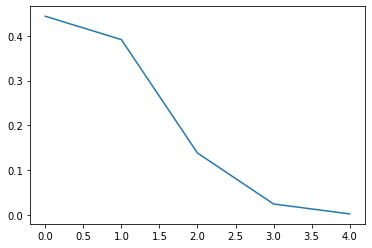

In [8]:
# run this code
x = np.arange(n)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Step 3: Explain what you observe from the plot above.

In [0]:
"""
your comments here

the probability of one is much higher than the other so it tends to one variable
"""

#### Step 4: Now plot PMF with 50, 500, and 5000 visitors.
To plot the PMF, you can copy the code given above and replace variable `dist` for the name of the variables where you have stored the new binomial objects for 50, 500 and 5000 visitors.

In [9]:
# your code here
n=5 
p=0.15
dist1 = scipy.stats.binom(n=n, p=p)
dist2 = scipy.stats.binom(n=50, p=p)
dist3 = scipy.stats.binom(n=500, p=p)
dist4 = scipy.stats.binom(n=5000, p=p)

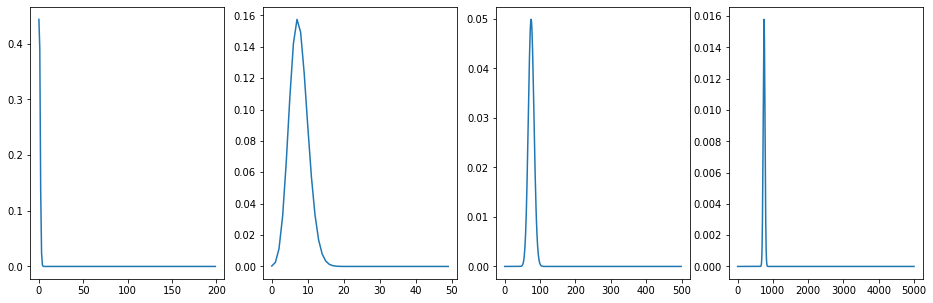

In [38]:
x = np.arange(n)

fig, ax = plt.subplots(1, 4,figsize=(16,5))

ax[0].plot(x, dist1.pmf(x))
ax[1].plot(np.arange(50), dist2.pmf(np.arange(50)))
ax[2].plot(np.arange(500), dist3.pmf(np.arange(500)))
ax[3].plot(np.arange(5000), dist4.pmf(np.arange(5000)))



plt.show()

#### Step 5: What did you notice from the distribution plots? Comment your findings.

In [0]:
"""
your comments here

higher the number of the sample, higher is the top of graphic and the data is less scattered
"""

# Challenge 3
#### Step 1: Research the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [0]:
"""
your comments here

https://en.wikipedia.org/wiki/Poisson_distribution


 is a discrete probability distribution that expresses the probability of a given number of events occurring in a 
 fixed interval of time or space if these events occur with a known constant mean rate and independently of the time 
 since the last event
"""


#### Step 2: A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

**Hint**: use `scipy.stats.poisson.pmf`.

In [13]:
# your code here
#poisson.pmf(k, mu, loc) - k = number i wanna check. mu = mean. loc =?

#scipy.stats.poisson.pmf(320,300)

average = 300
dist = poisson(average)
dist.pmf(320)

0.011612348610402475

#### Step 3: What is the probability of getting 60 visits?

In [15]:
# your code here
scipy.stats.poisson.pmf(60,300)
#average = 300
#dist = poisson(average)
#dist.pmf(60)


2.622743762294515e-64

#### Step 4: Create a list to store the Poisson distribution probabilities for 0 to 1000 visitors. Store your list in a variable called `arr`.

In [16]:
# your code here
arr = []

for i in tqdm(range(0,1001)):
    arr.append(scipy.stats.poisson.pmf(i,300))


#### Step 5: Plot the probabilities.
To do it, run the code in the cell below. Your plot should look like the one below:

![poisson distribution](../images/ch-3.png)

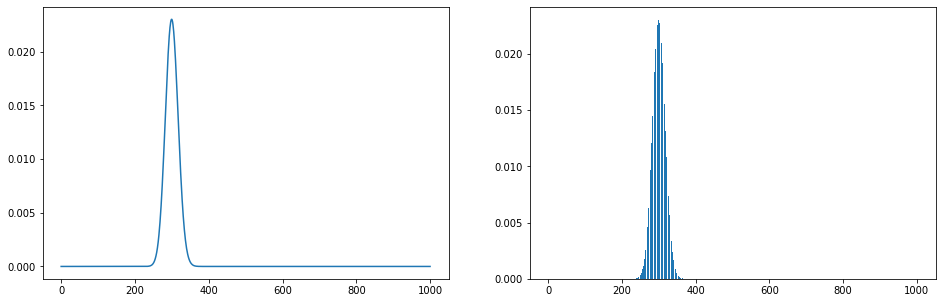

In [20]:
# run this code
fig, ax = plt.subplots(1, 2,figsize=(16,5))
ax[0].plot(arr)
ax[1].bar(range(0,1001),dist.pmf(range(0,1001)))
plt.show()

# Challenge 4 - Central Limit Theorem

A delivery company needs 35 minutes to deliver a package, with a standard deviation of 8 minutes. Suppose that in one day, they deliver 200 packages.

**Hint**: `stats.norm.cdf` can help you find the answers.

#### Step 1: What is the probability that the mean delivery time today is between 30 and 35 minutes?

In [48]:
# your code here

mu =35
std = 8
n = 200

#scipy.stats.norm.cdf(np.arange(30,35),8,n)

#norm.cdf(X,parameters['mu'],sigma)
#norm.cdf(np.arange(30,35),mu,std)
print(1 + norm.cdf(30,mu,std) - norm.cdf(35,mu,std))



0.7659855290487005


#### Step 2: What is the probability that in total, it takes more than 115 hours to deliver all 200 packages?

In [0]:
# your code here


# Challenge 5 - Normal Variables
The value (in thousands) of the monthly sales of a publishing company follows a normal distribution with a mean equal to 200 and a standard deviation equal to 40.

<div align="center">$X → N(200,40)$</div>

**Hint**: `stats.norm.cdf` can help you find the answers.

#### Step 1: Find the probability that the monthly sales are more than 300.

In [50]:
# your code here
#norm.cdf(X,parameters['mu'],sigma)
mean = 200
std = 40
n = 300

prob_menor_300 = scipy.stats.norm.cdf(n,mean,std)
print('probability higher than 300: ', 1- prob_menor_300)

probability higher than 300:  0.006209665325776159


#### Step 2: Find the probability that the monthly sales fall between 160 and 240.

In [51]:
# your code here
mean = 200
std = 40
n1 = 160
n2 = 240

scipy.stats.norm.cdf(n2,mean,std) - scipy.stats.norm.cdf(n1,mean,std)

0.6826894921370859

#### Step 3: Find the probability that the monthly sales do not exceed 150.

In [55]:
# your code here
n3=150

scipy.stats.norm.cdf(n3,mean,std)

0.10564977366685535

#### Step 4: Find the probability that the monthly sales exceed 3000.

In [61]:
# your code here
n4=3000
1 - scipy.stats.norm.cdf(n4,mean,std)

0.0

# Challenge 6 - Poisson distribution
The mean number of violent robberies per month that are registered in a particular barrio is 4.

**Hint**: `stats.poisson.cdf` can help you find the answers.

#### Step 1: Find the probability that in a particular month there is no violent robbery.

In [65]:
# your code here
mean =4


scipy.stats.poisson.cdf(0,mean)

0.018315638888734182

#### Step 2: Find the probability that there are at least 1 robbery in a given month.

In [66]:
# your code here
scipy.stats.poisson.cdf(1,mean)

0.0915781944436709

#### Step 3: Find the probability that there are between 2 and 6 (inclusive) robberies in a given month.

In [70]:
# your code here

scipy.stats.poisson.cdf(6,mean) - scipy.stats.poisson.cdf(2,mean)

0.6512227160438819

#### Step 4: Find the probability that there are more than 2 robberies in 15 days.

In [71]:
# your code here
scipy.stats.poisson.cdf(4,mean)

0.6288369351798734